                              OLS Regression Results                              
Dep. Variable:     log_gastos_familiar_pc   R-squared:                       0.136
Model:                                OLS   Adj. R-squared:                  0.135
Method:                     Least Squares   F-statistic:                     380.2
Date:                    Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                            20:27:18   Log-Likelihood:                -69343.
No. Observations:                   48425   AIC:                         1.387e+05
Df Residuals:                       48404   BIC:                         1.389e+05
Df Model:                              20                                         
Covariance Type:                nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

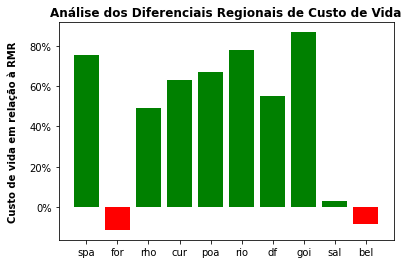

diferencial de custos de vida (%) das regiões metropolitanas em relação à de Recife:


,spa,for,rho,cur,poa,rio,df,goi,sal,bel
β^,75.39,-11.4,49.09,63.13,67.03,78.0,55.15,86.82,3.15,-8.53


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

base_pof = pd.read_csv("base_POF.csv", low_memory = False ,encoding = 'latin1').dropna()

# assigning the dummy variables
base_dummies = base_pof.copy()

unique_values_controle = base_dummies['group'].unique()
unique_values_regional = base_dummies['rm'].unique()

for value in unique_values_controle:
    base_dummies[value] = (base_dummies['group'] == value).astype(int)   

for value in unique_values_regional:
    base_dummies[value] = (base_dummies['rm'] == value).astype(int)

dummies_controle = base_dummies[['alimentacao', 'habitacao', 'vestuario', 'despesas diversas',
       'transporte','saude', 'higiene', 'servicos pessoasis',
       'recreacao e cultura', 'fumo', 'educacao']]    

dummies_regionais = base_dummies[[ 'spa','for','rho','cur','rec','poa', 'rio','df','goi','sal','bel']]

# Regressão Linear via Mínimos Quadrados Ordinários

base_pof['log_rendapc'] = np.log(base_pof['rendapc'])
base_pof['log_gastos_familiar_pc'] = np.log(base_pof['gastos_familiar_pc'])

variaveis_explicativas = pd.merge(dummies_regionais, dummies_controle, left_index=True, right_index=True)

variaveis_explicativas = variaveis_explicativas.drop('rec', axis = 1)
variaveis_explicativas = variaveis_explicativas.drop('alimentacao', axis = 1)

Y = base_pof['log_gastos_familiar_pc']
X = variaveis_explicativas
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

vetor_parametros = pd.DataFrame(model.params)
vetor_parametros['β^'] = vetor_parametros[0]
vetor_parametros = vetor_parametros.drop(0, axis = 1)
vetor_parametros = vetor_parametros.T

fig, ax = plt.subplots()

diferenciais_estimados = (np.exp(vetor_parametros))-1
diferenciais_regionais = (diferenciais_estimados)[['spa','for','rho','cur', 'poa','rio','df','goi','sal','bel']]

cores = ['green' if beta > 0 else 'red' for beta in diferenciais_regionais.T['β^']]

ax.bar(range(len(diferenciais_regionais.T['β^'])), diferenciais_regionais.T['β^'], color = cores)

ax.set_xticks(range(len(diferenciais_regionais.T['β^'])))
ax.set_xticklabels(list(diferenciais_regionais.T.index))

ax.set_ylabel('Custo de vida em relação à RMR', fontweight = 'bold', labelpad = 12)
ax.set_title('Análise dos Diferenciais Regionais de Custo de Vida', fontweight = 'bold')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.show()

print('diferencial de custos de vida (%) das regiões metropolitanas em relação à de Recife:')
display(round(diferenciais_regionais*100,2))